In [1]:
# Load common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
# Load data
data = pd.read_csv("./data/fashion-mnist.csv")

In [3]:
# Show the first five rows
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split to response variables and target variables
X = np.array(data.drop("label", axis=1))
y = np.array(data["label"])

# Include class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

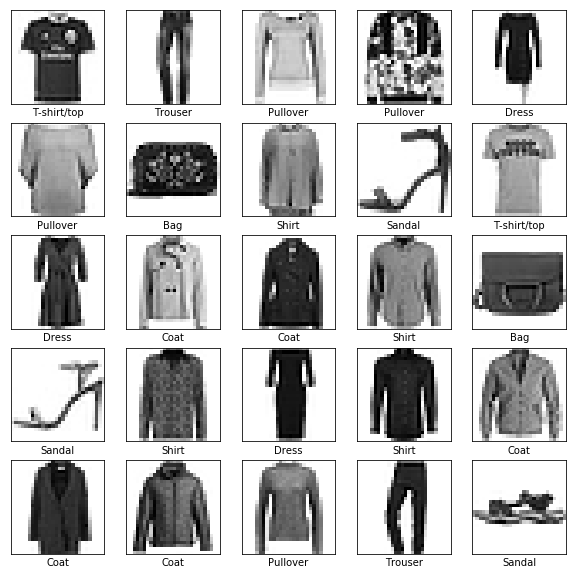

In [5]:
# Show images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y[i]])

In [6]:
# Print number of instances and features
print("Number of instances: %d" % X.shape[0])
print("Number of features: %d" % X.shape[1])

# Count class labels
unique, counts = np.unique(y, return_counts=True)
print("Number of class labels:")
print(dict(zip(unique, counts)))

Number of instances: 10000
Number of features: 784
Number of class labels:
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [7]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Feature scaling with standardization
X = StandardScaler().fit_transform(X)

In [8]:
# Split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# k Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_neighbors": [5], "metric": ["euclidean", "manhattan", "chebyshev"]}
]

classifier = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("All results:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

kNN_model = grid_search.best_estimator_

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 5}
All results:
0.8215 {'metric': 'euclidean', 'n_neighbors': 5}
0.823625 {'metric': 'manhattan', 'n_neighbors': 5}
0.63125 {'metric': 'chebyshev', 'n_neighbors': 5}


In [10]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)
nb_model = classifier

In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

param_grid = [
    {'max_depth': [1, 5, 10, 50, 100]}
]

tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

tree_model = grid_search.best_estimator_

Best parameters:  {'max_depth': 10}
0.197625 {'max_depth': 1}
0.689625 {'max_depth': 5}
0.7675 {'max_depth': 10}
0.7455 {'max_depth': 50}
0.7475 {'max_depth': 100}


============================== kNN ==============================
Classfication report
              precision    recall  f1-score   support

 T-shirt/top       0.72      0.85      0.78       192
     Trouser       0.98      0.95      0.96       192
    Pullover       0.71      0.78      0.74       212
       Dress       0.88      0.86      0.87       205
        Coat       0.72      0.74      0.73       204
      Sandal       0.99      0.91      0.95       193
       Shirt       0.63      0.53      0.58       200
     Sneaker       0.85      0.95      0.89       206
         Bag       0.99      0.88      0.93       196
  Ankle boot       0.93      0.93      0.93       200

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.83      0.83      2000

Confusion matrix


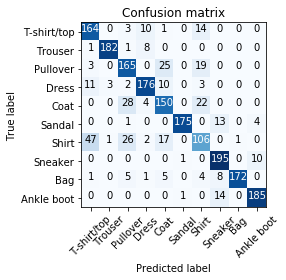

============================== Naive Bayes ==============================
Classfication report
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.48      0.60       192
     Trouser       0.43      0.95      0.59       192
    Pullover       0.63      0.36      0.46       212
       Dress       0.23      0.19      0.21       205
        Coat       0.40      0.77      0.53       204
      Sandal       0.86      0.29      0.43       193
       Shirt       0.32      0.03      0.05       200
     Sneaker       0.48      0.96      0.64       206
         Bag       0.82      0.68      0.74       196
  Ankle boot       0.93      0.55      0.69       200

   micro avg       0.53      0.53      0.53      2000
   macro avg       0.59      0.53      0.50      2000
weighted avg       0.59      0.53      0.49      2000

Confusion matrix


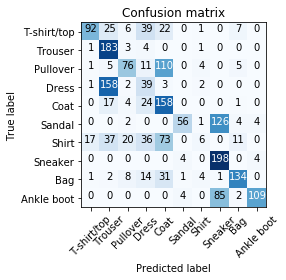

============================== Decision Tree ==============================
Classfication report
              precision    recall  f1-score   support

 T-shirt/top       0.73      0.69      0.71       192
     Trouser       0.94      0.93      0.94       192
    Pullover       0.62      0.56      0.59       212
       Dress       0.83      0.81      0.82       205
        Coat       0.60      0.76      0.67       204
      Sandal       0.88      0.81      0.84       193
       Shirt       0.45      0.43      0.44       200
     Sneaker       0.80      0.85      0.83       206
         Bag       0.88      0.90      0.89       196
  Ankle boot       0.89      0.88      0.88       200

   micro avg       0.76      0.76      0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

Confusion matrix


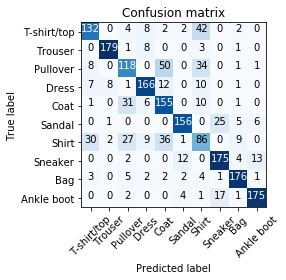

In [13]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=10)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


models = {'kNN': kNN_model, 'Naive Bayes': nb_model, 'Decision Tree': tree_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # make predictions on test set
    
    # Print evaluation results
    print(f"============================== {name} ==============================")
    
    # Print classification report
    print("Classfication report")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Compute confusion matrix
    print("Confusion matrix")
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')
    plt.show()